In [1]:
import pandas as pd
import glob
file1="us_simplified.csv"
file2="COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv" 
 
cases = pd.read_csv(file1) #Date	Admin2	Province/State	Confirmed	Deaths	Country/Region
vac = pd.read_csv(file2) # attribute detail : https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

In [2]:
def selectByDate(S,strat, end):#S: dataset, strat =2020-05-21 and end = 2020-05-23, will return the data in 2020-05-22
    return S[(S["Date"] > strat) & (S["Date"] < end ) ]
def selectByConfirmed(S,min_num, max_num):
    return S[(S["Confirmed"] > min_num) & (S["Confirmed"] < max_num ) ]
def selectByDeath(S,min_num, max_num):
    return S[(S["Deaths"] > min_num) & (S["Deaths"] < max_num ) ]


In [3]:

States_list = pd.unique(cases["Province/State"])
States_list


array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [4]:
states_data = dict()
for x in States_list:
    states_data[x] = cases[cases["Province/State"] == x]


In [5]:
#set state , and city
state_name = 'Colorado'
city_name = "Boulder"

In [6]:
'''
index  ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
 '''
state = states_data[state_name]
adams_list = pd.unique(state["Admin2"])
region_data = dict()
for x in adams_list:
    region_data[x] = state[(state["Admin2"] == x) ]
#datas in city 
city = region_data[city_name]


In [7]:
'''
cases: All data of covid19 cases in US
state(dictionary type): All data of covid19 cases in one State
city(dictionary type): All data of covid19 cases in one city
'''
print("states name:", States_list)
print("\n")
print("city names: " ,adams_list)
S = states_data["Alabama"]
selectByDate(S,"2020-05-21", "2020-06-01")

states name: ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


city names:  ['Adams' 'Alamosa' 'Arapahoe' 'Archuleta' 'Baca' 'Bent' 'Boulder'
 'Broomfield' 'Chaffee' 'Cheyenne' 'Clear Creek' 'Conejos' 'Costilla'
 'Crowley' 'Custer' 'Delta' 'Denver' 'Dolores' 'Douglas' 'Eagle' 'El Paso'
 'Elbert' 'Fremont' 'Garfield' 'Gilp

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
121,2020-05-22,Autauga,Alabama,151,3,US
122,2020-05-23,Autauga,Alabama,156,3,US
123,2020-05-24,Autauga,Alabama,160,3,US
124,2020-05-25,Autauga,Alabama,171,3,US
125,2020-05-26,Autauga,Alabama,191,3,US
...,...,...,...,...,...,...
42966,2020-05-27,Winston,Alabama,77,0,US
42967,2020-05-28,Winston,Alabama,79,0,US
42968,2020-05-29,Winston,Alabama,83,0,US
42969,2020-05-30,Winston,Alabama,84,0,US


In [8]:
vac["Date"] = vac["Date"].apply(pd.to_datetime)
vac["Date"] = vac["Date"].dt.strftime('%Y-%m-%d')
vac

,Date,MMWR_week,Location,Administered,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Administered_Dose1_Recip,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf
0,2021-10-09,40,IN,"6,908,981","257,085","2,515,547","4,111,823","24,526","3,554,195","3,296,642",49.0,"253,040","1,179,560","1,856,710","7,332"
1,2021-10-09,40,CT,"5,150,595","206,943","1,879,418","3,063,245",989,"2,750,654","2,474,824",69.4,"206,157","881,970","1,386,349",348
2,2021-10-09,40,MI,"10,916,450","372,771","4,222,919","6,319,132","1,628","5,708,654","5,253,381",52.6,"373,435","1,998,089","2,880,950",907
3,2021-10-09,40,RP,"31,298","2,333","24,450","4,515",0,"17,880","15,561",86.9,"2,338","11,583","1,640",0
4,2021-10-09,40,TN,"7,071,558","210,574","2,679,936","4,150,176","30,872","3,642,610","3,161,093",46.3,"203,103","1,170,487","1,779,565","7,938"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19162,2020-12-13,51,VI,0,0,0,0,0,0,0,0.0,0,0,0,0
19163,2020-12-13,51,US,0,0,0,0,0,0,0,0.0,0,0,0,0
19164,2020-12-13,51,GU,0,0,0,0,0,0,0,0.0,0,0,0,0
19165,2020-12-13,51,AS,0,0,0,0,0,0,0,0.0,0,0,0,0


In [9]:
vac_states = dict()
for x in pd.unique(vac["Location"]):
    vac_states[x] = vac[vac["Location"] == x]

In [10]:
pd.unique(vac["Location"])


array(['IN', 'CT', 'MI', 'RP', 'TN', 'GU', 'BP2', 'DD2', 'IL', 'OK', 'MH',
       'MS', 'MT', 'AS', 'PA', 'MO', 'ND', 'IA', 'MD', 'VT', 'ID', 'MN',
       'OR', 'NM', 'RI', 'WA', 'WY', 'WV', 'AK', 'AZ', 'MA', 'SD', 'NC',
       'VI', 'GA', 'DC', 'KY', 'CO', 'NE', 'WI', 'UT', 'HI', 'MP', 'PR',
       'FL', 'CA', 'VA2', 'NV', 'FM', 'IH2', 'SC', 'VA', 'AL', 'NJ', 'TX',
       'LA', 'OH', 'NH', 'DE', 'AR', 'US', 'KS', 'ME', 'NY'], dtype=object)

In [11]:
vac_states['CO']

,Date,MMWR_week,Location,Administered,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,Administered_Dose1_Recip,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf
37,2021-10-09,40,CO,"7,311,177","272,058","2,853,551","4,180,451","5,117","3,809,280","3,456,105",60.0,"267,392","1,312,023","1,875,183","1,507"
105,2021-10-08,40,CO,"7,310,621","272,009","2,853,501","4,179,994","5,117","3,808,796","3,455,928",60.0,"267,341","1,311,977","1,875,103","1,507"
133,2021-10-07,40,CO,"7,292,850","271,398","2,851,341","4,165,009","5,102","3,803,951","3,451,022",59.9,"266,664","1,311,047","1,871,810","1,501"
211,2021-10-06,40,CO,"7,273,165","270,938","2,847,139","4,150,008","5,080","3,799,871","3,446,292",59.8,"266,225","1,310,247","1,868,324","1,496"
263,2021-10-05,40,CO,"7,259,806","270,388","2,845,438","4,138,927","5,053","3,796,452","3,442,553",59.8,"265,696","1,309,646","1,865,725","1,486"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18884,2020-12-18,51,CO,"3,404",0,0,"3,404",0,0,0,0.0,0,0,0,0
18978,2020-12-17,51,CO,351,0,0,351,0,0,0,0.0,0,0,0,0
18996,2020-12-16,51,CO,183,0,0,183,0,0,0,0.0,0,0,0,0
19052,2020-12-15,51,CO,0,0,0,0,0,0,0,0.0,0,0,0,0


In [12]:
#hosptial data :https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u
hosp = dict()
files = glob.glob("new_data/*.csv")
for x in files:
    df = pd.read_csv(x)
    hosp[x[9:11]] = df


In [13]:
hosp.keys()

dict_keys(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [14]:
hosp['CO']
    

,Date,state,hospital_name,city,hospital_subtype,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,...,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum
0,2021-09-17,CO,KINDRED HOSPITAL-DENVER,DENVER,Long Term,81.0,81.0,48.0,44.7,44.7,...,313.0,0.0,0.0,336.0,28.0,28.0,0.0,0.0,0.0,0.0
1,2021-04-30,CO,NATIONAL JEWISH HEALTH,DENVER,Short Term,25.0,18.0,6.0,-999999.0,-999999.0,...,18.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-19,CO,KINDRED HOSPITAL AURORA,AURORA,Long Term,37.0,37.0,37.0,35.4,35.4,...,248.0,0.0,0.0,259.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-25,CO,CRAIG HOSPITAL,ENGLEWOOD,Long Term,88.0,88.0,88.0,86.1,86.1,...,603.0,-999999.0,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-11,CO,"ANIMAS SURGICAL HOSPITAL, LLC",DURANGO,Short Term,27.0,27.0,12.0,4.3,4.3,...,30.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,2020-07-31,CO,MEDICAL CENTER OF THE ROCKIES,LOVELAND,Short Term,197.0,197.0,197.0,143.3,143.3,...,1003.0,28.0,27.0,1379.0,252.0,252.0,117.0,117.0,14.0,14.0
5546,2020-07-31,CO,EAST MORGAN COUNTY HOSPITAL,BRUSH,Critical Access Hospitals,25.0,25.0,25.0,-999999.0,-999999.0,...,27.0,-999999.0,0.0,175.0,28.0,28.0,-999999.0,-999999.0,0.0,0.0
5547,2020-07-31,CO,SWEDISH MEDICAL CENTER,ENGLEWOOD,Short Term,429.0,407.0,407.0,324.3,320.4,...,2243.0,103.0,45.0,3003.0,623.0,476.0,449.0,429.0,36.0,11.0
5548,2020-07-31,CO,POUDRE VALLEY HOSPITAL,FORT COLLINS,Short Term,239.0,239.0,239.0,119.1,119.1,...,834.0,28.0,18.0,1673.0,238.0,238.0,66.0,66.0,17.0,17.0


In [15]:
selectByDate ( states_data["Colorado"][["Date","Confirmed", "Deaths"]], "2020-12-12","2020-12-14").sum()

Date         2020-12-132020-12-132020-12-132020-12-132020-1...
Confirmed                                               288193
Deaths                                                    3958
dtype: object

In [16]:
'''
cases: All data of covid19 cases in US
states_data(dictionary type): All data of covid19 cases in one State
city(dictionary type): All data of covid19 cases in one city
vac_states(dictionary type): data of vaccine 
hosp(dictionary type):data of hospital
'''

Co = vac_states["CO"].merge(states_data["Colorado"][["Date","Confirmed", "Deaths"]], left_on='Date', right_on='Date')

In [37]:
CO_data = selectByDate ( states_data["Colorado"][["Date","Confirmed", "Deaths"]], "2020-12-01","2021-10-30")
CO_data = CO_data.groupby("Date").sum(numeric_only=True)

In [38]:
Co = CO_data.merge(vac_states['Co'], left_on="Date",right_on="Date")
Co

KeyError: 'Co'

In [32]:
pre = 0
cur = 0
li =[]
for i in range(1,len(Co["Deaths"])-1):
        cur = Co["Deaths"][i]-Co["Deaths"][i-1]
        li.append(cur)

In [33]:
CO_data = selectByDate ( Co, "2020-12-14","2021-10-09")
CO_data.insert(1, 'daily_increase', li)
CO_data.columns

Index(['Date', 'daily_increase', 'Confirmed', 'Deaths', 'MMWR_week',
       'Location', 'Administered', 'Administered_Janssen',
       'Administered_Moderna', 'Administered_Pfizer', 'Administered_Unk_Manuf',
       'Administered_Dose1_Recip', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_Janssen',
       'Series_Complete_Moderna', 'Series_Complete_Pfizer',
       'Series_Complete_Unk_Manuf'],
      dtype='object')

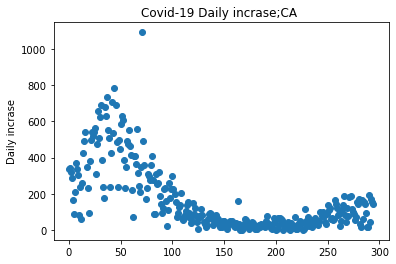

In [36]:
import matplotlib.pyplot as plt
plt.ylabel("Daily incrase")
plt.title("Covid-19 Daily incrase;CO ")
Y = [i for i in CO_data['daily_increase'] if i >= 0]
plt.scatter( list(range(0,len(Y))),Y)

In [22]:
population_US = 5759000
CO_data['Series_Complete_Yes']
ad_rate =[]
for i in range(1,len(CO_data['Series_Complete_Yes'])-1):
        num = int(CO_data['Series_Complete_Yes'][i].replace(',', ''))
        ad_rate.append(num/population_US)


In [28]:
#Y = [i for i in CO_data['daily_increase'] if i >= 0]
Y = CO_data['daily_increase']
print(len(Y))
X = ad_rate[0:]
X.insert(0,0)
X.insert(0,0)
print(len(X))
X

298
298


[0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09142611564507727,
 0.0955228338253169,
 0.09926289286334433,
 0.0993184580656364,
 0.10155790935926376,
 0.10581993401632228,
 0.11117277305087689,
 0.11553741969091856,
 0.12068623024830699,
 0.12071297100191006,
 0.12510540024309777,
 0.12653047404063206,
 0.12966556693870462,
 0.13299756902239973,
 0.1359440875151936,
 0.14551137350234417,
 0.15049609307171383,
 0.15252404931411703,
 0.1545051224170863,
 0.15628737628060427,
 0.1585009550269144,
 0.16103177635006077,
 0.16429727383226256,
 0.16788244

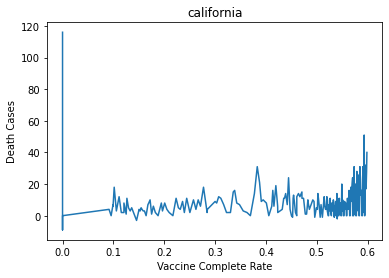

In [27]:
plt.xlabel("Vaccine Complete Rate")
plt.ylabel("Death Cases")
plt.title("california")
plt.plot(X,Y)

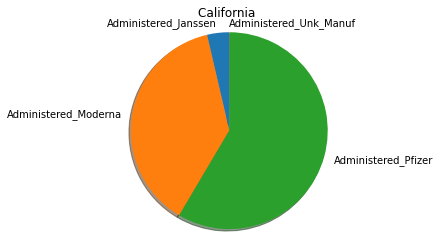

In [100]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Unk_Manuf'
sizes = [
int(CO_data['Administered_Janssen'][298].replace(',', '')),
int(CO_data['Administered_Moderna'][298].replace(',', '')), 
int(CO_data['Administered_Pfizer'][298].replace(',', '')),
int(CO_data['Administered_Unk_Manuf'][298].replace(',', ''))
]
explode = (0, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, 
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("California ")
plt.show()